# Pokemon Combat Simulator

In [325]:
import pandas as pd
from random import random

squirtle = {
    'name':'squirtle',
    'id':0,
    'hp': 84,
    'damage': 2,
    'hit_chance': .5,
}

geodude = {
    'name':'geodude',
    'id':1,
    'hp': 120,
    'damage': 1,
    'hit_chance': .8,
}

def get_winner(p1, p2):
    p1, p2 = p1.copy(), p2.copy()
    
    while True:
        if random() < p1['hit_chance']:
            p2['hp'] -= p1['damage']
            if p2['hp'] <= 0: return p1['id']
            
        if random() < p2['hit_chance']:
            p1['hp'] -= p2['damage']
            if p1['hp'] <= 0: return p2['id']

print(get_winner(squirtle, geodude))

1


In [326]:
outcomes = pd.Series([get_winner(squirtle, geodude) for _ in range(1000)])
outcomes.mean()

0.899

<AxesSubplot:ylabel='Frequency'>

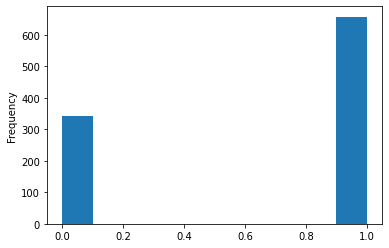

In [279]:
outcomes.plot.hist()

In [368]:
def get_p1_margin(p1, p2):
    p1, p2 = p1.copy(), p2.copy()
    
    while True:
        if random() < p1['hit_chance']:
            p2['hp'] -= p1['damage']
            if p2['hp'] <= 0: return p1['name'], p1['hp'] - p2['hp']
            
        if random() < p2['hit_chance']:
            p1['hp'] -= p2['damage']
            if p1['hp'] <= 0: return p2['name'], p1['hp'] - p2['hp']

print(get_p1_margin(squirtle, geodude))

('geodude', -4)


In [370]:
hp = pd.DataFrame([get_p1_margin(squirtle, geodude) for _ in range(10000)])
hp.set_index(0, inplace=True)
hp.mean()

1   -15.1044
dtype: float64

In [316]:
hp.value_counts()

-8     1038
-10     951
-4      903
-6      882
-12     845
-2      793
-14     759
-16     607
 1      435
-18     398
 2      383
 3      321
-20     313
 4      258
-22     208
 5      186
 6      151
 7      127
-24     103
 8       78
-26      60
 9       50
-28      39
 10      34
 11      18
-30      18
 12      16
 13       7
-32       4
 14       3
-34       3
 15       3
 18       1
-38       1
 17       1
 20       1
-36       1
 16       1
dtype: int64

<AxesSubplot:ylabel='Frequency'>

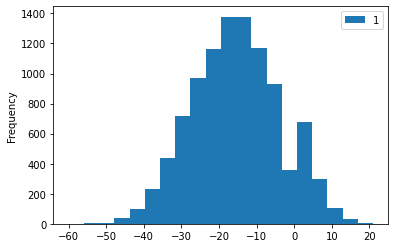

In [371]:
hp.plot.hist(bins=20)